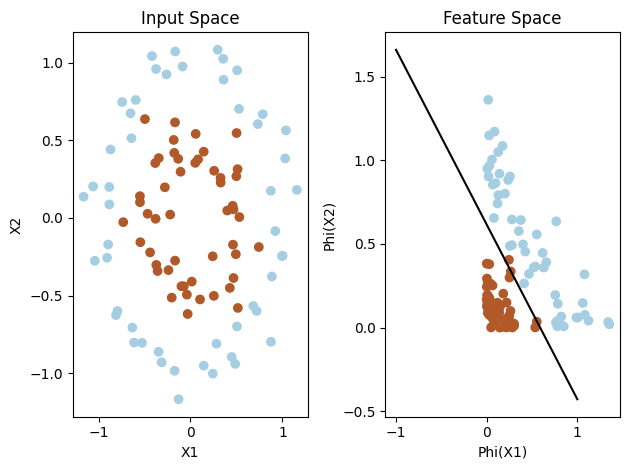

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Generate some sample data
X, y = datasets.make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Transform input space to feature space
def transform_input_space(X):
    phi_X = np.column_stack((X[:, 0]**2, X[:, 1]**2))
    return phi_X

# Create SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Fit SVM classifier on transformed feature space
X_transformed = transform_input_space(X)
svm_classifier.fit(X_transformed, y)

# Visualize input space
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Input Space')

# Visualize feature space
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Phi(X1)')
plt.ylabel('Phi(X2)')
plt.title('Feature Space')

# Plot separating hyperplane in feature space
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 1)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')

plt.tight_layout()
plt.show()
